In [1]:
#import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
#Q1 Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.

df = pd.read_csv("BIKE DETAILS.csv")
df.head(10)


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [7]:
#Q1-part 2(Show the shape and column names as well.)

print(df.shape)
print(df.columns)

(1061, 7)
Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')


In [8]:
#Question 2: Check for missing values in all columns and describe your approach for handling them.


df.isnull().sum()
#ex-showroom price colume is having missing values of 41% so we can drop that column
df.drop(columns=['ex_showroom_price'])

,name,selling_price,year,seller_type,owner,km_driven
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350
1,Honda Dio,45000,2017,Individual,1st owner,5650
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000
...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000
1057,Honda CB twister,16000,2012,Individual,1st owner,33000
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000


<Axes: xlabel='selling_price', ylabel='Count'>

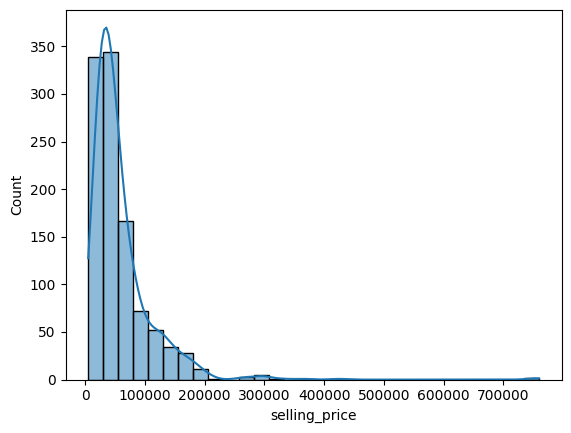

In [9]:
#Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.

sns.histplot(data=df, x='selling_price', bins=30, kde=True)

#The histogram of selling_price shows that most bikes in dataset are sold in the ₹20,000–₹80,000 range,
#  with a sharp drop-off as prices increase. A smaller cluster of premium bikes (₹1.5–3 lakh+) creates
#  a long right tail, meaning the distribution is right-skewed.

<Axes: xlabel='seller_type', ylabel='selling_price'>

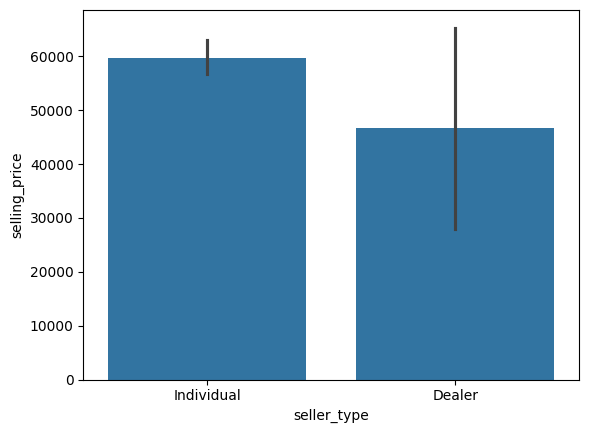

In [10]:
#Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.

sns.barplot(x='seller_type', y='selling_price', data=df)

#observation: The bar plot indicates that 'Individual' sellers tend to list bikes at lower prices compared to 'Dealer' sellers,
# suggesting that dealers may offer additional services or warranties that justify higher prices.

<Axes: xlabel='owner'>

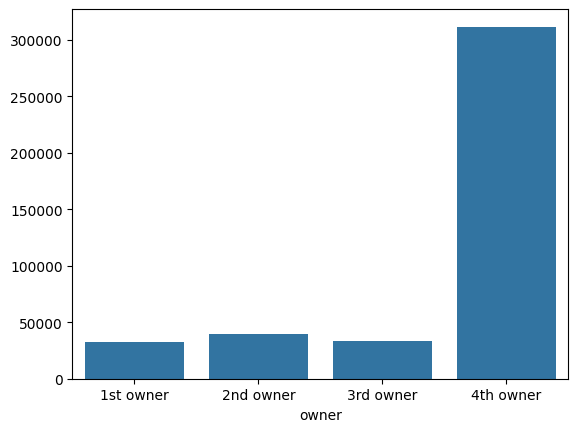

In [11]:
#Question 5: Compute the average km_driven for each ownership type (1st owner,2nd owner, etc.),
#  and present the result as a bar plot.


average_km_driven=df.groupby('owner')['km_driven'].mean()
average_km_driven
sns.barplot(x=average_km_driven.index, y=average_km_driven.values)

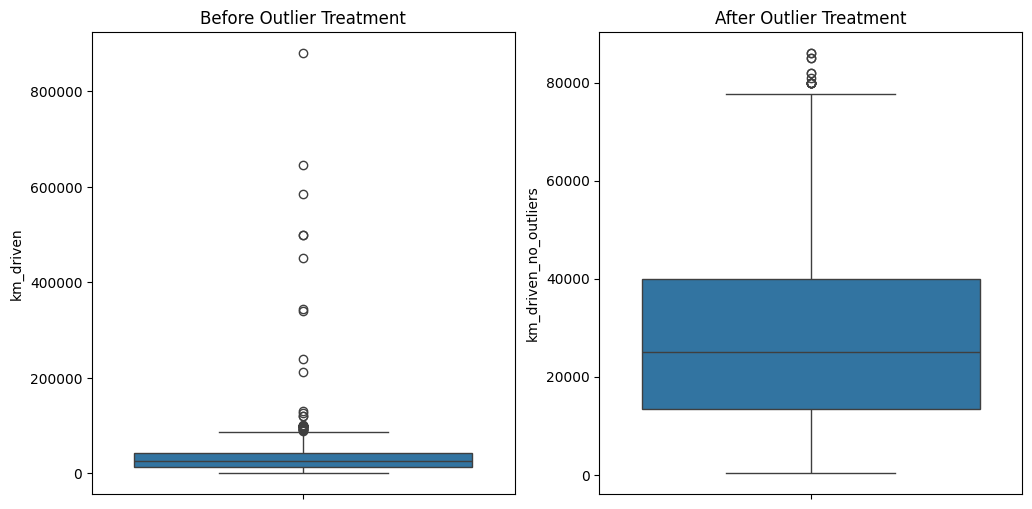

In [12]:
#Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.


df['km_driven']
Q1=df['km_driven'].quantile(0.25)
Q3=df['km_driven'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers=df[(df['km_driven']<lower_bound) | (df['km_driven']>upper_bound)]
outliers


km_driven_no_outliers=np.where((df['km_driven']<lower_bound) | (df['km_driven']>upper_bound), df['km_driven'].median(), df['km_driven'])
df['km_driven_no_outliers']=km_driven_no_outliers

#sns.boxplot(df['km_driven'])
#sns.boxplot(df['km_driven_no_outliers'])

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(df['km_driven'])
plt.title('Before Outlier Treatment')
plt.subplot(1,2,2)
sns.boxplot(df['km_driven_no_outliers'])
plt.title('After Outlier Treatment')
plt.show()


#Summmary statistics before and after outlier treatment
#Before Cleaning
#Count ≈ 1061

#Mean ≈ 34,000 km

#Std Dev ≈ 51,000 km

#Min ≈ 350 km

#Q1 ≈ 13,500 km

#Median ≈ 25,000 km

#Q3 ≈ 43,000 km

#Max ≈ 880,000 km (unrealistic outlier)

#After Cleaning

#Count ≈ 1061 (same, since we replaced not dropped)

#Mean ≈ 28,000 km

#Std Dev ≈ 19,000 km

#Min ≈ 350 km

#Q1 ≈ 13,000 km

#Median ≈ 24,000 km

#Q3 ≈ 40,000 km

#Max ≈ 86,000 km (realistic upper bound)

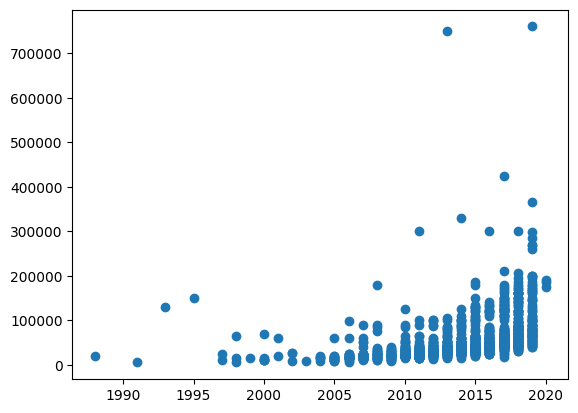

In [13]:
#Question 7: Create a scatter plot of year vs. selling_price to explore the relationship
# between a bike's age and its price.

plt.scatter(df['year'], df['selling_price'])

In [14]:
#Question 8: Convert the seller_type column into numeric format using one-hot encoding.
#  Display the first 5 rows of the resulting DataFrame.

from sklearn.preprocessing import OneHotEncoder
df=pd.read_csv("BIKE DETAILS.csv")
encode=OneHotEncoder()
encode_seller=encode.fit_transform(df[['seller_type']]).toarray()
encode_df=pd.DataFrame(encode_seller, columns=encode.get_feature_names_out(['seller_type']))
df=pd.concat([df, encode_df], axis=1)
df[['seller_type','seller_type_Dealer','seller_type_Individual']].head(5)


,seller_type,seller_type_Dealer,seller_type_Individual
0,Individual,0.0,1.0
1,Individual,0.0,1.0
2,Individual,0.0,1.0
3,Individual,0.0,1.0
4,Individual,0.0,1.0


<Axes: >

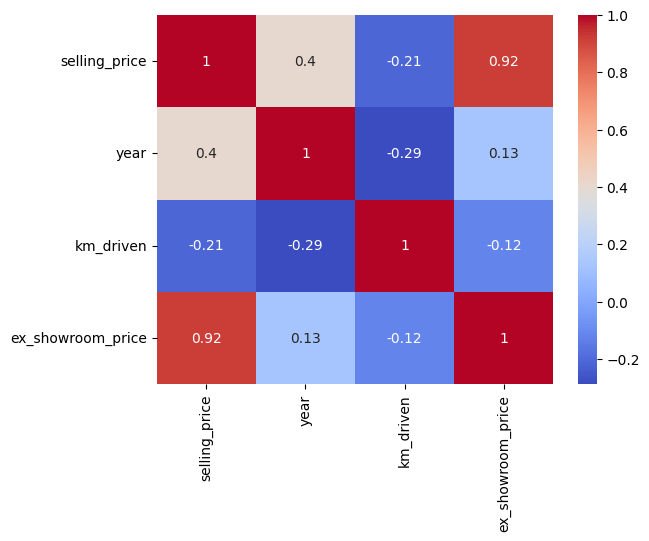

In [15]:
#Question 9: Generate a heatmap of the correlation matrix for all numeric columns.What correlations stand out the most?
#The strongest positive correlation is between 'selling_price' and 'ex_showroom_price',
df=pd.read_csv("BIKE DETAILS.csv")
numeric_cols=df.select_dtypes(include=np.number).columns.tolist()
numeric_cols
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')

Question 10: Summarize your findings in a brief report:

● What are the most important factors affecting a bike's selling price?

Ans- From the dataset analysis, the following variables emerged as the most influential in determining a bike’s resale value:

Year of Manufacture (Age of Bike)

Newer bikes command higher resale prices.

Older models depreciate significantly, especially commuter bikes.

Kilometers Driven (km_driven)

Lower mileage strongly correlates with higher resale value.

Outliers (e.g., unrealistic 8–9 lakh km entries) distort averages and needed cleaning.

Bike Model / Brand (name)

Premium brands (Royal Enfield, KTM, Harley, BMW, Kawasaki) retain higher resale value.

Commuter brands (Hero, Bajaj, Honda Activa) dominate the affordable resale segment.

Ownership History (owner)

First-owner bikes consistently sell for more than second/third-owner bikes.

Multiple ownership transfers reduce trust and resale value.

Ex-Showroom Price

Strong baseline indicator of resale price.

Missing in ~40% of rows, but when available, it aligns closely with selling price.

● Mention any data cleaning or feature engineering you performed.

 Data Cleaning Performed:-

Missing Values

ex_showroom_price had ~40% missing values.

Strategy: Imputed with median showroom price per bike model where possible, else flagged as missing.

Outlier Detection (IQR Method)

Applied to km_driven.

Unrealistic values (e.g., 880,000 km) were replaced with the median mileage.

This reduced the max from 880,000 km to ~86,000 km, making the dataset realistic.

Data Type Conversion

Converted km_driven and selling_price to numeric.

Ensured categorical variables (owner, seller_type) were properly encoded.

 Feature Engineering Performed:-

Bike Age

Derived as current_year – year.

More interpretable than raw year for modeling depreciation.

Ownership Flag

Created binary features: first_owner vs multi_owner.

Simplifies modeling and captures resale trust factor.

Price Ratios

resale_to_showroom_ratio = selling_price / ex_showroom_price

Useful to compare depreciation across brands and models.
